In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [2]:
# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print (x_train.shape)

(60000, 28, 28, 1)


In [4]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history=model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 72s - loss: 0.0062 - acc: 0.9979 - val_loss: 0.0388 - val_acc: 0.9904
Epoch 2/10
60000/60000 [==============================] - 78s - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0336 - val_acc: 0.9923
Epoch 3/10
60000/60000 [==============================] - 82s - loss: 0.0056 - acc: 0.9983 - val_loss: 0.0397 - val_acc: 0.9909
Epoch 4/10
60000/60000 [==============================] - 82s - loss: 0.0064 - acc: 0.9981 - val_loss: 0.0351 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 80s - loss: 0.0032 - acc: 0.9989 - val_loss: 0.0372 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 74s - loss: 0.0058 - acc: 0.9981 - val_loss: 0.0316 - val_acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 75s - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0372 - val_acc: 0.9911
Epoch 8/10
60000/60000 [==============================

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0443917901368
Test accuracy: 0.9914


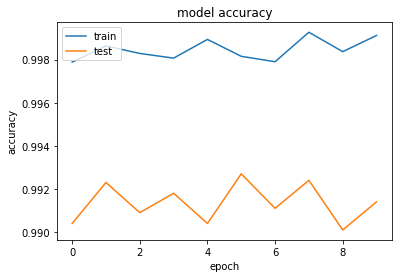

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

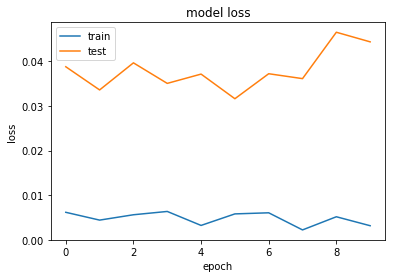

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
